# Web scrapping 

## 1.select topic
## 2.search for the website(400 X 8)
## 3.problem statement
## 4.extract the data
## 5.create a DataFrame
## 6.export into .cvs format
## 7.read csv file
## 8.data cleaning
## 9.data analysis and visualization(EDA)
## 10.interpretations 
## 11.conclusion and feature engineering
## 12.presentation

In [1]:
import requests as rq
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
import seaborn as sns

%matplotlib inline

## getting the request from website

In [68]:
# page=rq.get('https://www.cars.com/shopping/results/?redirect_event%5Bnew_account%5D=true&redirect_event%5Bsocial_platform%5D=google').text
# # page


## creating soup element

In [69]:
# soup=BeautifulSoup(page,'lxml')
# #soup

## Results

In [70]:
# # 20 results for each page
# result=soup.find_all('div',class_='vehicle-card')
# len(result),

(20,)

## Name

In [71]:
# #name=soup.find('h2',class_='title').text
# import numpy as np

# names=[]
# types=[]
# prices=[]
# ratings=[]
# reviews=[]
# dealers=[]

# for i in range(1,22):
#     URL='https://www.cars.com/shopping/results/?page={}&page_size=20&dealer_id=&exterior_color_slugs[]=beige&exterior_color_slugs[]=black&exterior_color_slugs[]=blue&exterior_color_slugs[]=gray&exterior_color_slugs[]=orange&exterior_color_slugs[]=purple&exterior_color_slugs[]=red&exterior_color_slugs[]=white&exterior_color_slugs[]=yellow&keyword=&list_price_max=&list_price_min=&makes[]=mercedes_benz&maximum_distance=all&mileage_max=&sort=best_match_desc&stock_type=all&year_max=&year_min=&zip='.format(i)
#     page=rq.get(URL)
#     soup=BeautifulSoup(page.text,'html.parser')
#     result=soup.find_all('div',class_='vehicle-card')
    
#     #page
#     for r in result:
#         name=r.find('h2',class_='title').text
#         names.append(name )
#         type=r.find('p',class_='stock-type').text
#         types.append(type)
#         price=r.find('span',class_='primary-price').text    
#         if price is None:
#             prices.append(np.Nan)
#         else: 
#             prices.append(price)
#         rating=r.find('span',class_='sds-rating__count')
#         if rating is None:
#             ratings.append(np.NaN)
#         else:
#             ratings.append(rating.text)
#         review=r.find('span',class_='sds-rating__link')
#         if review is None:
#             reviews.append(np.NaN)
#         else:
#             reviews.append(review.text)

        
#         dealer=r.find('div',class_='dealer-name').text.replace('\n','')
#         dealers.append(dealer)
# #len(names)
# #types
# #prices
# #ratings
# dealers

['Mercedes-Benz of San Antonio',
 'Mercedes-Benz of Houston Greenway',
 'Mercedes-Benz of North Orlando',
 'Mercedes-Benz of Tuscaloosa',
 'Mercedes-Benz of San Jose',
 'Mercedes-Benz of Elmbrook',
 'Mercedes-Benz of Wichita',
 'Mercedes-Benz of Miami',
 'Mercedes-Benz of Carlsbad',
 'Benzel-Busch Motor Car',
 'Benzel-Busch Motor Car',
 'Mercedes-Benz of Tysons Corner',
 'Mercedes-Benz of Carlsbad',
 'Mercedes-Benz of Catonsville',
 'Mercedes-Benz of Buckhead',
 'Mercedes-Benz of Fort Washington',
 'Mercedes-Benz of Buckhead',
 "Walter's Mercedes-Benz of Riverside",
 'Autohaus on Edens',
 'RBM of Atlanta',
 'Mercedes-Benz of Plano',
 'RBM of Atlanta',
 'Mercedes-Benz of Buckhead',
 'Mercedes-Benz of Fort Washington',
 'Euro Motorcars Devon',
 'Mercedes-Benz of Oakland',
 'Motor Werks - Barrington Auto Mall',
 'Motor Werks - Barrington Auto Mall',
 'Mercedes-Benz of Fort Lauderdale',
 'Mercedes-Benz of Clearwater',
 'Mercedes-Benz of Tuscaloosa',
 'Mercedes-Benz of Carlsbad',
 'Mercedes

In [74]:
df=pd.DataFrame({'Name':names,'Type':types,'Price':prices,'Rating':ratings,'Reviews':reviews,'Dealer':dealers})
df

,Name,Type,Price,Rating,Reviews,Dealer
0,2021 Mercedes-Benz GLC 300 Base,New,"$54,730",4.9,"(1,860 reviews)",Mercedes-Benz of San Antonio
1,2022 Mercedes-Benz GLC 300 Base,New,"$45,650",4.8,"(2,337 reviews)",Mercedes-Benz of Houston Greenway
2,2022 Mercedes-Benz AMG SL 55 Base,New,"$146,200",4.7,(580 reviews),Mercedes-Benz of North Orlando
3,2023 Mercedes-Benz S-Class S 580 4MATIC,New,"$140,325",NaN,(14 reviews),Mercedes-Benz of Tuscaloosa
4,2022 Mercedes-Benz CLA 250 Base,New,"$44,905",4.6,(772 reviews),Mercedes-Benz of San Jose
...,...,...,...,...,...,...
428,2015 Mercedes-Benz GLK-Class GLK 350 4MATIC,Used,"$19,950",4.9,(409 reviews),BMW of Fort Wayne/MINI of Fort Wayne
429,2019 Mercedes-Benz GLC 350e Base 4MATIC,Used,"$34,367",4.4,"(1,569 reviews)",Mercedes-Benz of Houston North
430,2019 Mercedes-Benz C-Class C 300,Used,"$29,286",NaN,(0 reviews),Pine Belt Chevrolet
431,2019 Mercedes-Benz AMG CLS 53 S-Model 4MATIC,Mercedes-Benz Certified,"$67,999",4.9,"(1,305 reviews)",Mercedes-Benz of Austin


In [76]:
df.to_csv('cars.csv',index=False)

# Data cleaning


In [2]:
df=pd.read_csv('cars.csv')




In [3]:
df['Rating'].unique()

array([4.9, 4.8, 4.7, nan, 4.6, 4.3, 4.4, 4.2, 4.5, 4.1, 3.9, 3.8, 5. ,
       3.6, 3.3, 4. , 3.1, 2.1, 3. , 3.5, 3.7, 3.2])

In [4]:
df['Rating']=df['Rating'].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     433 non-null    object 
 1   Type     433 non-null    object 
 2   Price    433 non-null    object 
 3   Rating   378 non-null    float64
 4   Reviews  432 non-null    object 
 5   Dealer   433 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.4+ KB


In [6]:
df['Reviews']=df['Reviews'].apply(lambda x:re.compile(r'[0-9]').findall(str(x)))

In [7]:
df['Reviews']=df['Reviews'].apply(lambda x:''.join(x))

In [8]:
df.head()

,Name,Type,Price,Rating,Reviews,Dealer
0,2021 Mercedes-Benz GLC 300 Base,New,"$54,730",4.9,1860,Mercedes-Benz of San Antonio
1,2022 Mercedes-Benz GLC 300 Base,New,"$45,650",4.8,2337,Mercedes-Benz of Houston Greenway
2,2022 Mercedes-Benz AMG SL 55 Base,New,"$146,200",4.7,580,Mercedes-Benz of North Orlando
3,2023 Mercedes-Benz S-Class S 580 4MATIC,New,"$140,325",NaN,14,Mercedes-Benz of Tuscaloosa
4,2022 Mercedes-Benz CLA 250 Base,New,"$44,905",4.6,772,Mercedes-Benz of San Jose


In [9]:
df['Year']=df['Name'].apply(lambda x:re.compile(r'\d{4}').findall(str(x)))

In [10]:
df['Year']=df.Year.apply(lambda x:''.join(x))

In [11]:
# df['Name']=df.Name.apply(lambda x:x.lstrip(re.search(r'\d{4}')))
# df

In [12]:
#filling null vaules in Ratings
df['Rating']=df["Rating"].fillna(0)


In [13]:
# creating the stars column from rating column
df['Stars']=df['Rating'].apply(lambda x:re.compile(r'\d.').findall(str(x)))

In [14]:
# removing the list data from stars
df['Stars']=df.Stars.apply(lambda x:''.join(x))

In [15]:
# removing the dot from stars
df['Stars']=df.Stars.apply(lambda x:x.strip('.'))

In [16]:
df

,Name,Type,Price,Rating,Reviews,Dealer,Year,Stars
0,2021 Mercedes-Benz GLC 300 Base,New,"$54,730",4.9,1860,Mercedes-Benz of San Antonio,2021,4
1,2022 Mercedes-Benz GLC 300 Base,New,"$45,650",4.8,2337,Mercedes-Benz of Houston Greenway,2022,4
2,2022 Mercedes-Benz AMG SL 55 Base,New,"$146,200",4.7,580,Mercedes-Benz of North Orlando,2022,4
3,2023 Mercedes-Benz S-Class S 580 4MATIC,New,"$140,325",0.0,14,Mercedes-Benz of Tuscaloosa,2023,0
4,2022 Mercedes-Benz CLA 250 Base,New,"$44,905",4.6,772,Mercedes-Benz of San Jose,2022,4
...,...,...,...,...,...,...,...,...
428,2015 Mercedes-Benz GLK-Class GLK 350 4MATIC,Used,"$19,950",4.9,409,BMW of Fort Wayne/MINI of Fort Wayne,2015,4
429,2019 Mercedes-Benz GLC 350e Base 4MATIC,Used,"$34,367",4.4,1569,Mercedes-Benz of Houston North,2019,4
430,2019 Mercedes-Benz C-Class C 300,Used,"$29,286",0.0,0,Pine Belt Chevrolet,2019,0
431,2019 Mercedes-Benz AMG CLS 53 S-Model 4MATIC,Mercedes-Benz Certified,"$67,999",4.9,1305,Mercedes-Benz of Austin,2019,4


In [17]:
# index 429 conrtains 20192500 so replacing it to 209
df['Year'].iloc[429]='2019'
df['Year'].iloc[429]
df['Year']=df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     433 non-null    object 
 1   Type     433 non-null    object 
 2   Price    433 non-null    object 
 3   Rating   433 non-null    float64
 4   Reviews  433 non-null    object 
 5   Dealer   433 non-null    object 
 6   Year     433 non-null    int32  
 7   Stars    433 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 25.5+ KB


C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\3042968857.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
#converting stars to int
df['Stars']=df['Stars'].astype(int)

In [19]:
#converting Rating to int
df['Rating']=df['Rating'].astype(float)

In [20]:
#replacing dollor to rupee
df['Price']=df['Price'].apply(lambda x:x.replace('$','₹'))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     433 non-null    object 
 1   Type     433 non-null    object 
 2   Price    433 non-null    object 
 3   Rating   433 non-null    float64
 4   Reviews  433 non-null    object 
 5   Dealer   433 non-null    object 
 6   Year     433 non-null    int32  
 7   Stars    433 non-null    int32  
dtypes: float64(1), int32(2), object(5)
memory usage: 23.8+ KB


In [22]:
#removing the year from name
df['Name']=df['Name'].str.replace(r'\d{4}','')

C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\2485853994.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [23]:
# removing the mercebes-benz from name

df['Company_name']=df['Name'].apply(lambda x:re.compile(r'Mercedes-Benz ').findall(str(x)))
df['Company_name']=df.Company_name.apply(lambda x:''.join(x))
df


,Name,Type,Price,Rating,Reviews,Dealer,Year,Stars,Company_name
0,Mercedes-Benz GLC 300 Base,New,"₹54,730",4.9,1860,Mercedes-Benz of San Antonio,2021,4,Mercedes-Benz
1,Mercedes-Benz GLC 300 Base,New,"₹45,650",4.8,2337,Mercedes-Benz of Houston Greenway,2022,4,Mercedes-Benz
2,Mercedes-Benz AMG SL 55 Base,New,"₹146,200",4.7,580,Mercedes-Benz of North Orlando,2022,4,Mercedes-Benz
3,Mercedes-Benz S-Class S 580 4MATIC,New,"₹140,325",0.0,14,Mercedes-Benz of Tuscaloosa,2023,0,Mercedes-Benz
4,Mercedes-Benz CLA 250 Base,New,"₹44,905",4.6,772,Mercedes-Benz of San Jose,2022,4,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...
428,Mercedes-Benz GLK-Class GLK 350 4MATIC,Used,"₹19,950",4.9,409,BMW of Fort Wayne/MINI of Fort Wayne,2015,4,Mercedes-Benz
429,Mercedes-Benz GLC 350e Base 4MATIC,Used,"₹34,367",4.4,1569,Mercedes-Benz of Houston North,2019,4,Mercedes-Benz
430,Mercedes-Benz C-Class C 300,Used,"₹29,286",0.0,0,Pine Belt Chevrolet,2019,0,Mercedes-Benz
431,Mercedes-Benz AMG CLS 53 S-Model 4MATIC,Mercedes-Benz Certified,"₹67,999",4.9,1305,Mercedes-Benz of Austin,2019,4,Mercedes-Benz


In [24]:
#removing mercedes benxz name for name
df["Name"]=df.Name.str.replace('Mercedes-Benz','')


In [25]:
# remnaming the column name to mmodel
df['Model']=df['Name']
#droppin Name
df.drop('Name',axis=1,inplace=True)
df

,Type,Price,Rating,Reviews,Dealer,Year,Stars,Company_name,Model
0,New,"₹54,730",4.9,1860,Mercedes-Benz of San Antonio,2021,4,Mercedes-Benz,GLC 300 Base
1,New,"₹45,650",4.8,2337,Mercedes-Benz of Houston Greenway,2022,4,Mercedes-Benz,GLC 300 Base
2,New,"₹146,200",4.7,580,Mercedes-Benz of North Orlando,2022,4,Mercedes-Benz,AMG SL 55 Base
3,New,"₹140,325",0.0,14,Mercedes-Benz of Tuscaloosa,2023,0,Mercedes-Benz,S-Class S 580 4MATIC
4,New,"₹44,905",4.6,772,Mercedes-Benz of San Jose,2022,4,Mercedes-Benz,CLA 250 Base
...,...,...,...,...,...,...,...,...,...
428,Used,"₹19,950",4.9,409,BMW of Fort Wayne/MINI of Fort Wayne,2015,4,Mercedes-Benz,GLK-Class GLK 350 4MATIC
429,Used,"₹34,367",4.4,1569,Mercedes-Benz of Houston North,2019,4,Mercedes-Benz,GLC 350e Base 4MATIC
430,Used,"₹29,286",0.0,0,Pine Belt Chevrolet,2019,0,Mercedes-Benz,C-Class C 300
431,Mercedes-Benz Certified,"₹67,999",4.9,1305,Mercedes-Benz of Austin,2019,4,Mercedes-Benz,AMG CLS 53 S-Model 4MATIC


In [26]:
df.to_csv('carsnew1.csv',index=False)

In [27]:
df1=pd.read_csv('carsnew1.csv',)
#df1

In [28]:
#removing the type which is mercedus benz+certified
df1=df1[df1['Type'] != 'Mercedes-Benz Certified']
#df1

In [29]:
df1['Price']=df1['Price'].str.replace('₹','')
df1['Price']=df1['Price'].str.replace(',','')
# df1['Price']=df1['Price'].astype(float)df1


In [30]:
#dropping the columns which is not priced
df2=df1[ df1['Price']!="Not Priced"]
df2

,Type,Price,Rating,Reviews,Dealer,Year,Stars,Company_name,Model
0,New,54730,4.9,1860.0,Mercedes-Benz of San Antonio,2021,4,Mercedes-Benz,GLC 300 Base
1,New,45650,4.8,2337.0,Mercedes-Benz of Houston Greenway,2022,4,Mercedes-Benz,GLC 300 Base
2,New,146200,4.7,580.0,Mercedes-Benz of North Orlando,2022,4,Mercedes-Benz,AMG SL 55 Base
3,New,140325,0.0,14.0,Mercedes-Benz of Tuscaloosa,2023,0,Mercedes-Benz,S-Class S 580 4MATIC
4,New,44905,4.6,772.0,Mercedes-Benz of San Jose,2022,4,Mercedes-Benz,CLA 250 Base
...,...,...,...,...,...,...,...,...,...
427,Used,46500,4.3,635.0,Benson Hyundai,2019,4,Mercedes-Benz,AMG C 43 Base 4MATIC
428,Used,19950,4.9,409.0,BMW of Fort Wayne/MINI of Fort Wayne,2015,4,Mercedes-Benz,GLK-Class GLK 350 4MATIC
429,Used,34367,4.4,1569.0,Mercedes-Benz of Houston North,2019,4,Mercedes-Benz,GLC 350e Base 4MATIC
430,Used,29286,0.0,0.0,Pine Belt Chevrolet,2019,0,Mercedes-Benz,C-Class C 300


In [31]:
# converting price to int
df2['Price']=df2['Price'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 432
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          395 non-null    object 
 1   Price         395 non-null    int32  
 2   Rating        395 non-null    float64
 3   Reviews       394 non-null    float64
 4   Dealer        395 non-null    object 
 5   Year          395 non-null    int64  
 6   Stars         395 non-null    int64  
 7   Company_name  395 non-null    object 
 8   Model         395 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 29.3+ KB


C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\786795881.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# index 429 conrtains 20192500 so replacing it to 209
df['Year'].iloc[429]='2019'
df['Year'].iloc[429]
df['Year']=df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          433 non-null    object 
 1   Price         433 non-null    object 
 2   Rating        433 non-null    float64
 3   Reviews       433 non-null    object 
 4   Dealer        433 non-null    object 
 5   Year          433 non-null    int32  
 6   Stars         433 non-null    int32  
 7   Company_name  433 non-null    object 
 8   Model         433 non-null    object 
dtypes: float64(1), int32(2), object(6)
memory usage: 27.2+ KB


C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\3042968857.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
#removing the year the in the wrong format
df2['Year']=df2['Year'].astype(str)
# df2['Year']=df2.Year.drop(df2['Year'].str.replace('2500',''))
df2['Year']=df2.Year.str.replace('2500','')
df2['Year']=df2.Year.str.replace('3500','')
df2['Year']=df2['Year'].astype(int)
df2['Year'].values

C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\922715640.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\922715640.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\922715640.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

array([2021, 2022, 2022, 2023, 2022, 2023, 2022, 2022, 2022, 2022, 2023,
       2022, 2023, 2023, 2022, 2022, 2022, 2023, 2023, 2022, 2023, 2022,
       2022, 2022, 2022, 2023, 2023, 2022, 2023, 2023, 2023, 2023, 2023,
       2023, 2022, 2023, 2022, 2022, 2023, 2022, 2022, 2023, 2022, 2023,
       2022, 2022, 2022, 2023, 2023, 2022, 2022, 2023, 2023, 2022, 2022,
       2022, 2022, 2017, 2023, 2022, 2022, 2022, 2022, 2023, 2022, 2022,
       2023, 2022, 2022, 2023, 2022, 2023, 2022, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2022, 2022, 2023, 2023,
       2023, 2023, 2022, 2022, 2023, 2022, 2023, 2022, 2022, 2022, 2022,
       2022, 2023, 2022, 2022, 2022, 2023, 2022, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2022, 2023, 2023, 2022, 2022,
       2021, 2022, 2022, 2021, 2022, 2022, 2022, 2023, 2023, 2023, 2022,
       2022, 2022, 2023, 2022, 2023, 2023, 2023, 2022, 2023, 2023, 2023,
       2022, 2023, 2022, 2022, 2022, 2022, 2022, 20

# 9. Data analysis and Visualization(EDA)

In [34]:
df2.head()

,Type,Price,Rating,Reviews,Dealer,Year,Stars,Company_name,Model
0,New,54730,4.9,1860.0,Mercedes-Benz of San Antonio,2021,4,Mercedes-Benz,GLC 300 Base
1,New,45650,4.8,2337.0,Mercedes-Benz of Houston Greenway,2022,4,Mercedes-Benz,GLC 300 Base
2,New,146200,4.7,580.0,Mercedes-Benz of North Orlando,2022,4,Mercedes-Benz,AMG SL 55 Base
3,New,140325,0.0,14.0,Mercedes-Benz of Tuscaloosa,2023,0,Mercedes-Benz,S-Class S 580 4MATIC
4,New,44905,4.6,772.0,Mercedes-Benz of San Jose,2022,4,Mercedes-Benz,CLA 250 Base


In [35]:
df2.tail()

,Type,Price,Rating,Reviews,Dealer,Year,Stars,Company_name,Model
427,Used,46500,4.3,635.0,Benson Hyundai,2019,4,Mercedes-Benz,AMG C 43 Base 4MATIC
428,Used,19950,4.9,409.0,BMW of Fort Wayne/MINI of Fort Wayne,2015,4,Mercedes-Benz,GLK-Class GLK 350 4MATIC
429,Used,34367,4.4,1569.0,Mercedes-Benz of Houston North,2019,4,Mercedes-Benz,GLC 350e Base 4MATIC
430,Used,29286,0.0,0.0,Pine Belt Chevrolet,2019,0,Mercedes-Benz,C-Class C 300
432,Used,134894,4.9,5311.0,Fletcher Jones Motorcars - Newport Beach,2023,4,Mercedes-Benz,EQS 580 Base 4MATIC


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 432
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          395 non-null    object 
 1   Price         395 non-null    int32  
 2   Rating        395 non-null    float64
 3   Reviews       394 non-null    float64
 4   Dealer        395 non-null    object 
 5   Year          395 non-null    int32  
 6   Stars         395 non-null    int64  
 7   Company_name  395 non-null    object 
 8   Model         395 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 27.8+ KB


In [37]:
df2.describe()

,Price,Rating,Reviews,Year,Stars
count,395.000000,395.000000,394.000000,395.00000,395.000000
mean,90395.579747,3.953924,1143.845178,2021.15443,3.432911
std,56833.740518,1.566416,1401.333321,3.04850,1.350852
min,6097.000000,0.000000,0.000000,2002.00000,0.000000
25%,50237.500000,4.250000,326.000000,2021.00000,4.000000
50%,71240.000000,4.600000,772.000000,2022.00000,4.000000
75%,124953.000000,4.700000,1408.500000,2023.00000,4.000000
max,499998.000000,5.000000,9484.000000,2023.00000,5.000000


# Univariate  analysis
## Price greater than 75k
### 

In [38]:
# price graeter than 50000 dollors
price_greaterthan_75k=df2[df2['Price'] >=75000]
#price_greaterthan_75k


In [63]:
fig=px.histogram(price_greaterthan_75k,x='Price',color='Type',title='Price greater than $75k ')
fig

The above histogram graph shows the price disibution for the used and new cars.From this graph it sates that there are more new cars which is greater than $75k and some cars are used .Scope is more for new cars.

## Price less than  75k

In [40]:
price_lessthan_75k=df2[df2['Price'] <=75000]
#price_lessthan_75k

In [41]:
fig=px.histogram(price_lessthan_75k,x='Price',color='Type',title='Price less than $75k')
fig

The above histogram graph shows the price disibution for the used and new cars.From this graph we can say that with the price of less than $75k we can buy used cars as well as new cars.Scope is more for used cars and new cars as well.

In [60]:
fig=px.bar(df2,x='Type',color='Type')
fig.show()

The above bar graph shows the count of the new cars and used cars.In the graph it clears states that new cars have more frequency than used cars.

In [43]:
#fivertable

### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='Price', ylabel='Density'>

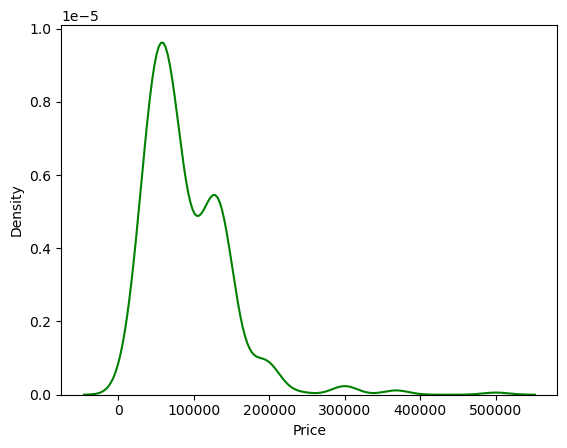

In [44]:
sns.kdeplot(data=df2,x='Price',color='green')


The above kde plot shows the density curve for the price ranges from 0 to 200000.


## Bi-varaite analysis

## anlysis price by year wise

In [45]:
fig = px.violin(df2, x="Type",y='Price',color="Type")# violin for distribution
fig.show()# it is in normal distribution

The above viloin graph shows the distribution of price over the new cars and used cars.New cars have more price comparing to the used cars

## Prices for used cars


In [46]:
used=df2[df2["Type"]=='Used']
#used

In [47]:
fig=px.box(used,y='Price',x='Type',title='Used cars price in USD($)',color='Type')
fig

The average price for the used cars ranges from $10k to $80k and some other cars have prices above $80k 


# price for New cars

In [48]:
new=df2[df2["Type"]=='New']
#new


In [49]:
fig=px.box(new,y='Price',x='Type',title='New cars price in USD($)')
fig

The average price for the used cars ranges from $10k to $240k and some other cars have prices above $290k 


## Ratings for new car and used car

In [50]:
fig=px.scatter(used,y='Rating',x='Model',title='Ratings for used cars',color='Model')
fig

From the above scatter plot we can see the ratings of the used cars have average ratings from 2 to 5.Some others cars have not rated they are 0 ratings.

## Reviews for rating

In [51]:
fig=px.scatter(new,y='Rating',x='Reviews',title='Reviews for rating',color='Model')
fig

In [52]:
fig=px.scatter(new,y='Rating',x='Model',title='Ratings for new cars',color='Model')
fig

From the above scatter plot we can see the ratings of the used cars have average ratings from 3.5 to 5.Some others cars have not rated they are 0 ratings.

## comparing prices

In [53]:
fig = px.box(df2, x="Year", y="Price", color="Type",title='Comparing prices for car types')
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [54]:
df2['Year']=df2['Year'].astype(str)
df2['Year']=df2['Year'].astype(str)
# df2['Year']=df2.Year.drop(df2['Year'].str.replace('2500',''))
df2['Year']=df2.Year.str.replace('2500','')
df2['Year']=df2.Year.str.replace('3500','')

C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\3780568414.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\3780568414.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adepu bharath kumar\AppData\Local\Temp\ipykernel_17128\3780568414.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [55]:
fig = px.pie(df2, values='Price', names='Type',color_discrete_sequence=px.colors.sequential.RdBu,title='Percentage of new and used cars')
fig.show()

## Correlation

In [67]:

 correlation=df2.corr()
df2

,Type,Price,Rating,Reviews,Dealer,Year,Stars,Company_name,Model
0,New,54730,4.9,1860.0,Mercedes-Benz of San Antonio,2021,4,Mercedes-Benz,GLC 300 Base
1,New,45650,4.8,2337.0,Mercedes-Benz of Houston Greenway,2022,4,Mercedes-Benz,GLC 300 Base
2,New,146200,4.7,580.0,Mercedes-Benz of North Orlando,2022,4,Mercedes-Benz,AMG SL 55 Base
3,New,140325,0.0,14.0,Mercedes-Benz of Tuscaloosa,2023,0,Mercedes-Benz,S-Class S 580 4MATIC
4,New,44905,4.6,772.0,Mercedes-Benz of San Jose,2022,4,Mercedes-Benz,CLA 250 Base
...,...,...,...,...,...,...,...,...,...
427,Used,46500,4.3,635.0,Benson Hyundai,2019,4,Mercedes-Benz,AMG C 43 Base 4MATIC
428,Used,19950,4.9,409.0,BMW of Fort Wayne/MINI of Fort Wayne,2015,4,Mercedes-Benz,GLK-Class GLK 350 4MATIC
429,Used,34367,4.4,1569.0,Mercedes-Benz of Houston North,2019,4,Mercedes-Benz,GLC 350e Base 4MATIC
430,Used,29286,0.0,0.0,Pine Belt Chevrolet,2019,0,Mercedes-Benz,C-Class C 300


<AxesSubplot:>

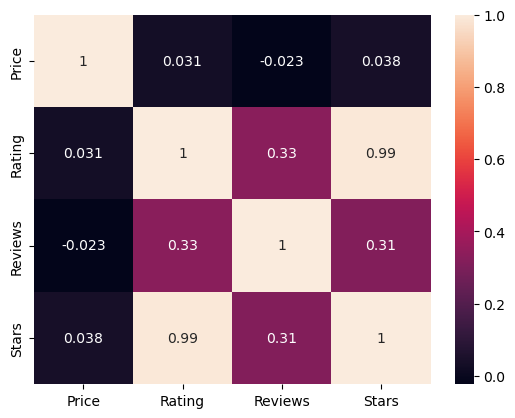

In [71]:
annot=True
sns.heatmap(data=correlation,annot=annot)


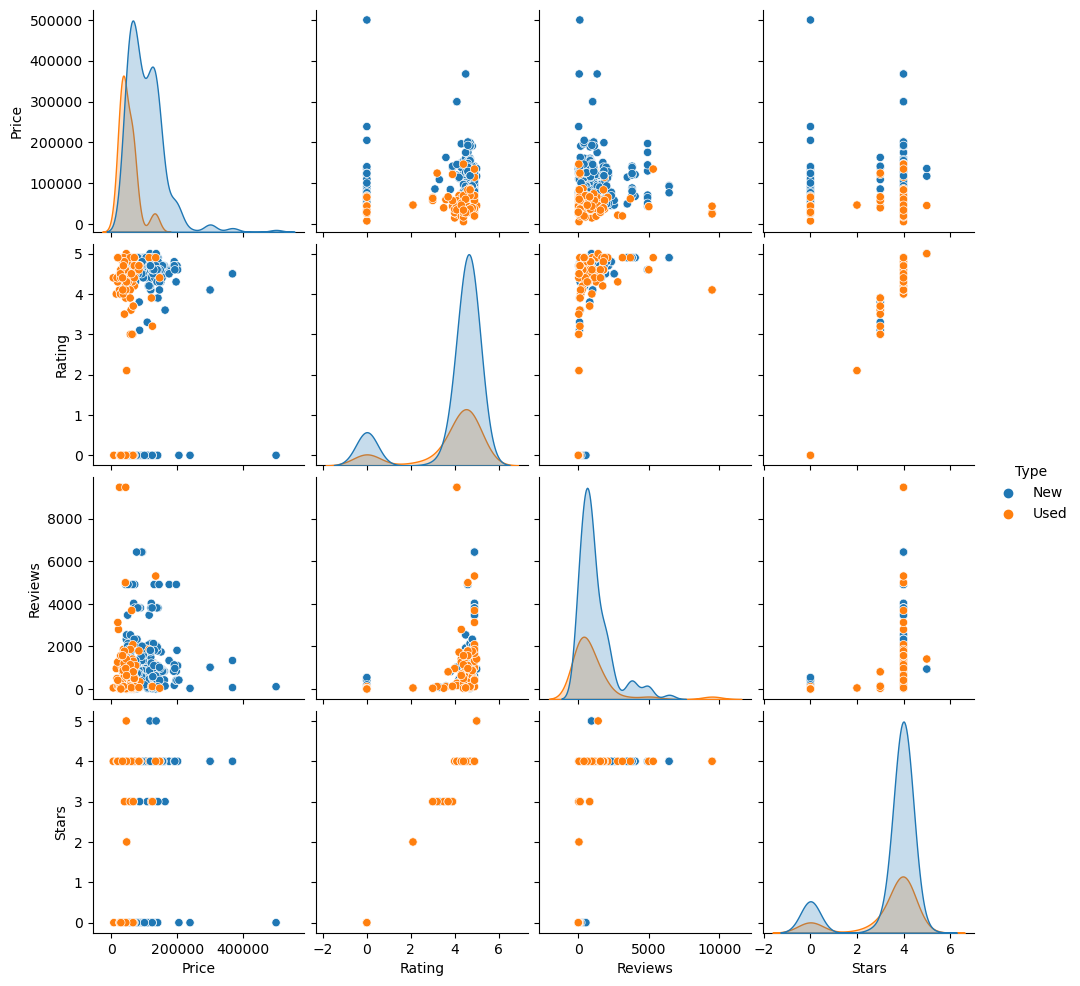

In [58]:

sns.pairplot(data=df2,hue='Type')

In [59]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

NameError: name 'correlation' is not defined